In [198]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv


In [199]:
#Reading dataset
df = pd.read_csv("/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv")
df.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [200]:
#last rows of data
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [201]:
#showing rows and columns of dataset
df.shape

(36275, 19)

In [202]:
#showing information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [203]:
#checking null values
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [204]:
#finding unique values 
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [205]:
df["market_segment_type"].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [206]:
df["room_type_reserved"].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [207]:
df["type_of_meal_plan"].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [208]:
#finding unique no of value counts in columns
df["no_of_previous_cancellations"].value_counts() 

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

In [209]:
df["no_of_previous_bookings_not_canceled"].value_counts() 


0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: no_of_previous_bookings_not_canceled, dtype: int64

In [210]:
#dropping few columns
df.drop(["Booking_ID","no_of_previous_cancellations","no_of_previous_bookings_not_canceled","arrival_year"],axis = 1, inplace = True)

In [211]:
df.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,10,2,Offline,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,11,6,Online,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2,28,Online,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,5,20,Online,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,4,11,Online,0,94.50,0,Canceled


In [212]:
df["type_of_meal_plan"].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [213]:
#Feature Engineering : Mapping types of meal Plans into numerical values

df["type_of_meal_plan"] = df["type_of_meal_plan"].map({"Meal Plan 1": 1, 'Not Selected': 0, 'Meal Plan 2': 2 ,'Meal Plan 3': 3})


In [214]:
df["type_of_meal_plan"]

0        1
1        0
2        1
3        1
4        0
        ..
36270    1
36271    1
36272    1
36273    0
36274    1
Name: type_of_meal_plan, Length: 36275, dtype: int64

In [215]:
df["room_type_reserved"].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [216]:
#Feature Engineering : Mapping types pf meal Plans into numerical values

df["room_type_reserved"] = df["room_type_reserved"].map({'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3,'Room_Type 4': 4,'Room_Type 5': 5,'Room_Type 6': 6,'Room_Type 7': 7})

In [217]:
df["room_type_reserved"]

0        1
1        1
2        1
3        1
4        1
        ..
36270    4
36271    1
36272    1
36273    1
36274    1
Name: room_type_reserved, Length: 36275, dtype: int64

In [218]:
df["market_segment_type"].unique()


array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [219]:
#Feature Engineering : Mapping types pf meal Plans into numerical values

df["market_segment_type"] = df["market_segment_type"].map({"Offline": 0, 'Online': 1, 'Corporate': 2 ,'Aviation': 3,'Complementary': 4})

In [220]:
df["market_segment_type"]

0        0
1        1
2        1
3        1
4        1
        ..
36270    1
36271    1
36272    1
36273    1
36274    0
Name: market_segment_type, Length: 36275, dtype: int64

In [221]:
#converting object type to int of these columns

df["type_of_meal_plan"] = df["type_of_meal_plan"].astype(int)
df["room_type_reserved"]= df["room_type_reserved"].astype(int)
df["market_segment_type"]= df["market_segment_type"].astype(int)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   no_of_adults                36275 non-null  int64  
 1   no_of_children              36275 non-null  int64  
 2   no_of_weekend_nights        36275 non-null  int64  
 3   no_of_week_nights           36275 non-null  int64  
 4   type_of_meal_plan           36275 non-null  int64  
 5   required_car_parking_space  36275 non-null  int64  
 6   room_type_reserved          36275 non-null  int64  
 7   lead_time                   36275 non-null  int64  
 8   arrival_month               36275 non-null  int64  
 9   arrival_date                36275 non-null  int64  
 10  market_segment_type         36275 non-null  int64  
 11  repeated_guest              36275 non-null  int64  
 12  avg_price_per_room          36275 non-null  float64
 13  no_of_special_requests      362

In [224]:
df["booking_status"].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [ ]:
#One hot encoding is a technique used to represent categorical variables as numerical values

In [252]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['booking_status'])
print(one_hot_encoded_data)

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     1                  1   
...             ...             ...                   ...                ...   
36270             3               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

       type_of_meal_plan  required_car_

In [254]:
from sklearn.preprocessing import OneHotEncoder
#Create an instance of One-hot-encoder
enc=OneHotEncoder()

In [257]:
enc_data=pd.DataFrame(enc.fit_transform(df[['booking_status']]).toarray())
enc_data 

,0,1
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
36270,0.0,1.0
36271,1.0,0.0
36272,0.0,1.0
36273,1.0,0.0


In [258]:
df.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,10,2,0,0,65.00,0,Not_Canceled
1,2,0,2,3,0,0,1,5,11,6,1,0,106.68,1,Not_Canceled


In [226]:
#Dividing the data into train and test wherein x as independent variable and y, as in dependent variable
x = df.iloc[: ,: -1]
y = df["booking_status"]

#Train data (independent Variable)
x.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests
0,2,0,1,2,1,0,1,224,10,2,0,0,65.00,0
1,2,0,2,3,0,0,1,5,11,6,1,0,106.68,1
2,1,0,2,1,1,0,1,1,2,28,1,0,60.00,0
3,2,0,0,2,1,0,1,211,5,20,1,0,100.00,0
4,2,0,1,1,0,0,1,48,4,11,1,0,94.50,0


In [227]:
#Test data(Dependent Variable)
y.head()

0    Not_Canceled
1    Not_Canceled
2        Canceled
3        Canceled
4        Canceled
Name: booking_status, dtype: object

In [228]:
#Importing libraries for best feature selection : SelectKBest Algorithem
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2

In [229]:
x.shape

(36275, 14)

In [230]:
#Apply SlectKBest Algorithem
ordered_rank_features = SelectKBest(score_func =chi2, k=10)
ordered_feature = ordered_rank_features.fit(x,y)



In [231]:
#creating 2 columns as Feature and Scores for checking scores of best features available
dfscores = pd.DataFrame(ordered_feature.scores_, columns = ["Score"])
dfcolumns = pd.DataFrame(x.columns)

In [232]:
#Merging both the columns by (col)
features_rank = pd.concat([dfcolumns,dfscores],axis = 1)

In [233]:
#showing Ranking of the columns with best scores
features_rank.columns = ["Features", "Score"]
features_rank

,Features,Score
0,no_of_adults,39.967573
1,no_of_children,61.119279
2,no_of_weekend_nights,128.539472
3,no_of_week_nights,283.301404
4,type_of_meal_plan,21.464414
5,required_car_parking_space,261.098182
6,room_type_reserved,21.977865
7,lead_time,604368.906381
8,arrival_month,5.810592
9,arrival_date,20.072918


In [234]:
#ranking of features in Descending order
features_rank.nlargest(10,"Score")

,Features,Score
7,lead_time,604368.906381
12,avg_price_per_room,8777.701483
13,no_of_special_requests,2317.563293
11,repeated_guest,406.835877
3,no_of_week_nights,283.301404
5,required_car_parking_space,261.098182
2,no_of_weekend_nights,128.539472
1,no_of_children,61.119279
10,market_segment_type,44.802499
0,no_of_adults,39.967573


In [235]:
#Feature Importance
#This technique gives you a score for each feature of your data,the higher the score mor relevant it is


In [236]:
#importing model ExtraTreesClassifier for fitting on x, y
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [237]:
print(model.feature_importances_)

[0.03200065 0.0103199  0.04533464 0.06559449 0.02489685 0.0069778
 0.01988375 0.30250146 0.0931621  0.10148604 0.05073861 0.00719671
 0.13437035 0.10553665]


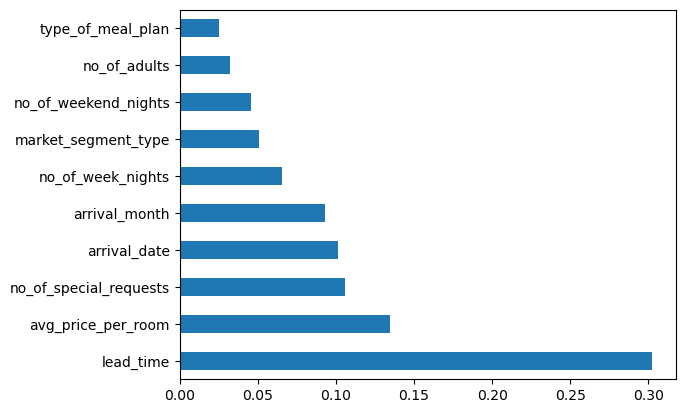

In [238]:
#Ranking shown by graph of best featires selected by model
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [239]:
#checking correlation of features among themselves
df.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.103316,0.105622,-0.004139,0.011429,0.270348,0.097287,0.021841,0.026338,-0.095543,-0.192277,0.296886,0.189401
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.042216,0.034244,0.364073,-0.047091,-0.003076,0.025482,0.073159,-0.036348,0.337728,0.124486
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.018762,-0.031111,0.057368,0.046595,-0.009894,0.027304,-0.019804,-0.067107,-0.004525,0.060593
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,0.026888,-0.048784,0.094125,0.149650,0.037376,-0.009305,-0.065301,-0.099764,0.022753,0.045994
type_of_meal_plan,-0.004139,0.042216,-0.018762,0.026888,1.000000,-0.015161,0.093410,0.226712,0.017222,0.015952,-0.223440,0.010001,0.134703,-0.090276
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,-0.015161,1.000000,0.038778,-0.066445,-0.015505,-0.000037,0.116730,0.110909,0.061304,0.087922
room_type_reserved,0.270348,0.364073,0.057368,0.094125,0.093410,0.038778,1.000000,-0.107793,-0.005967,0.032919,0.162680,-0.025826,0.469899,0.145041
lead_time,0.097287,-0.047091,0.046595,0.149650,0.226712,-0.066445,-0.107793,1.000000,0.136814,0.006479,-0.312433,-0.135984,-0.062596,-0.101645
arrival_month,0.021841,-0.003076,-0.009894,0.037376,0.017222,-0.015505,-0.005967,0.136814,1.000000,-0.042780,-0.026920,0.000341,0.054423,0.110552
arrival_date,0.026338,0.025482,0.027304,-0.009305,0.015952,-0.000037,0.032919,0.006479,-0.042780,1.000000,0.007677,-0.015949,0.017898,0.018352


<AxesSubplot:>

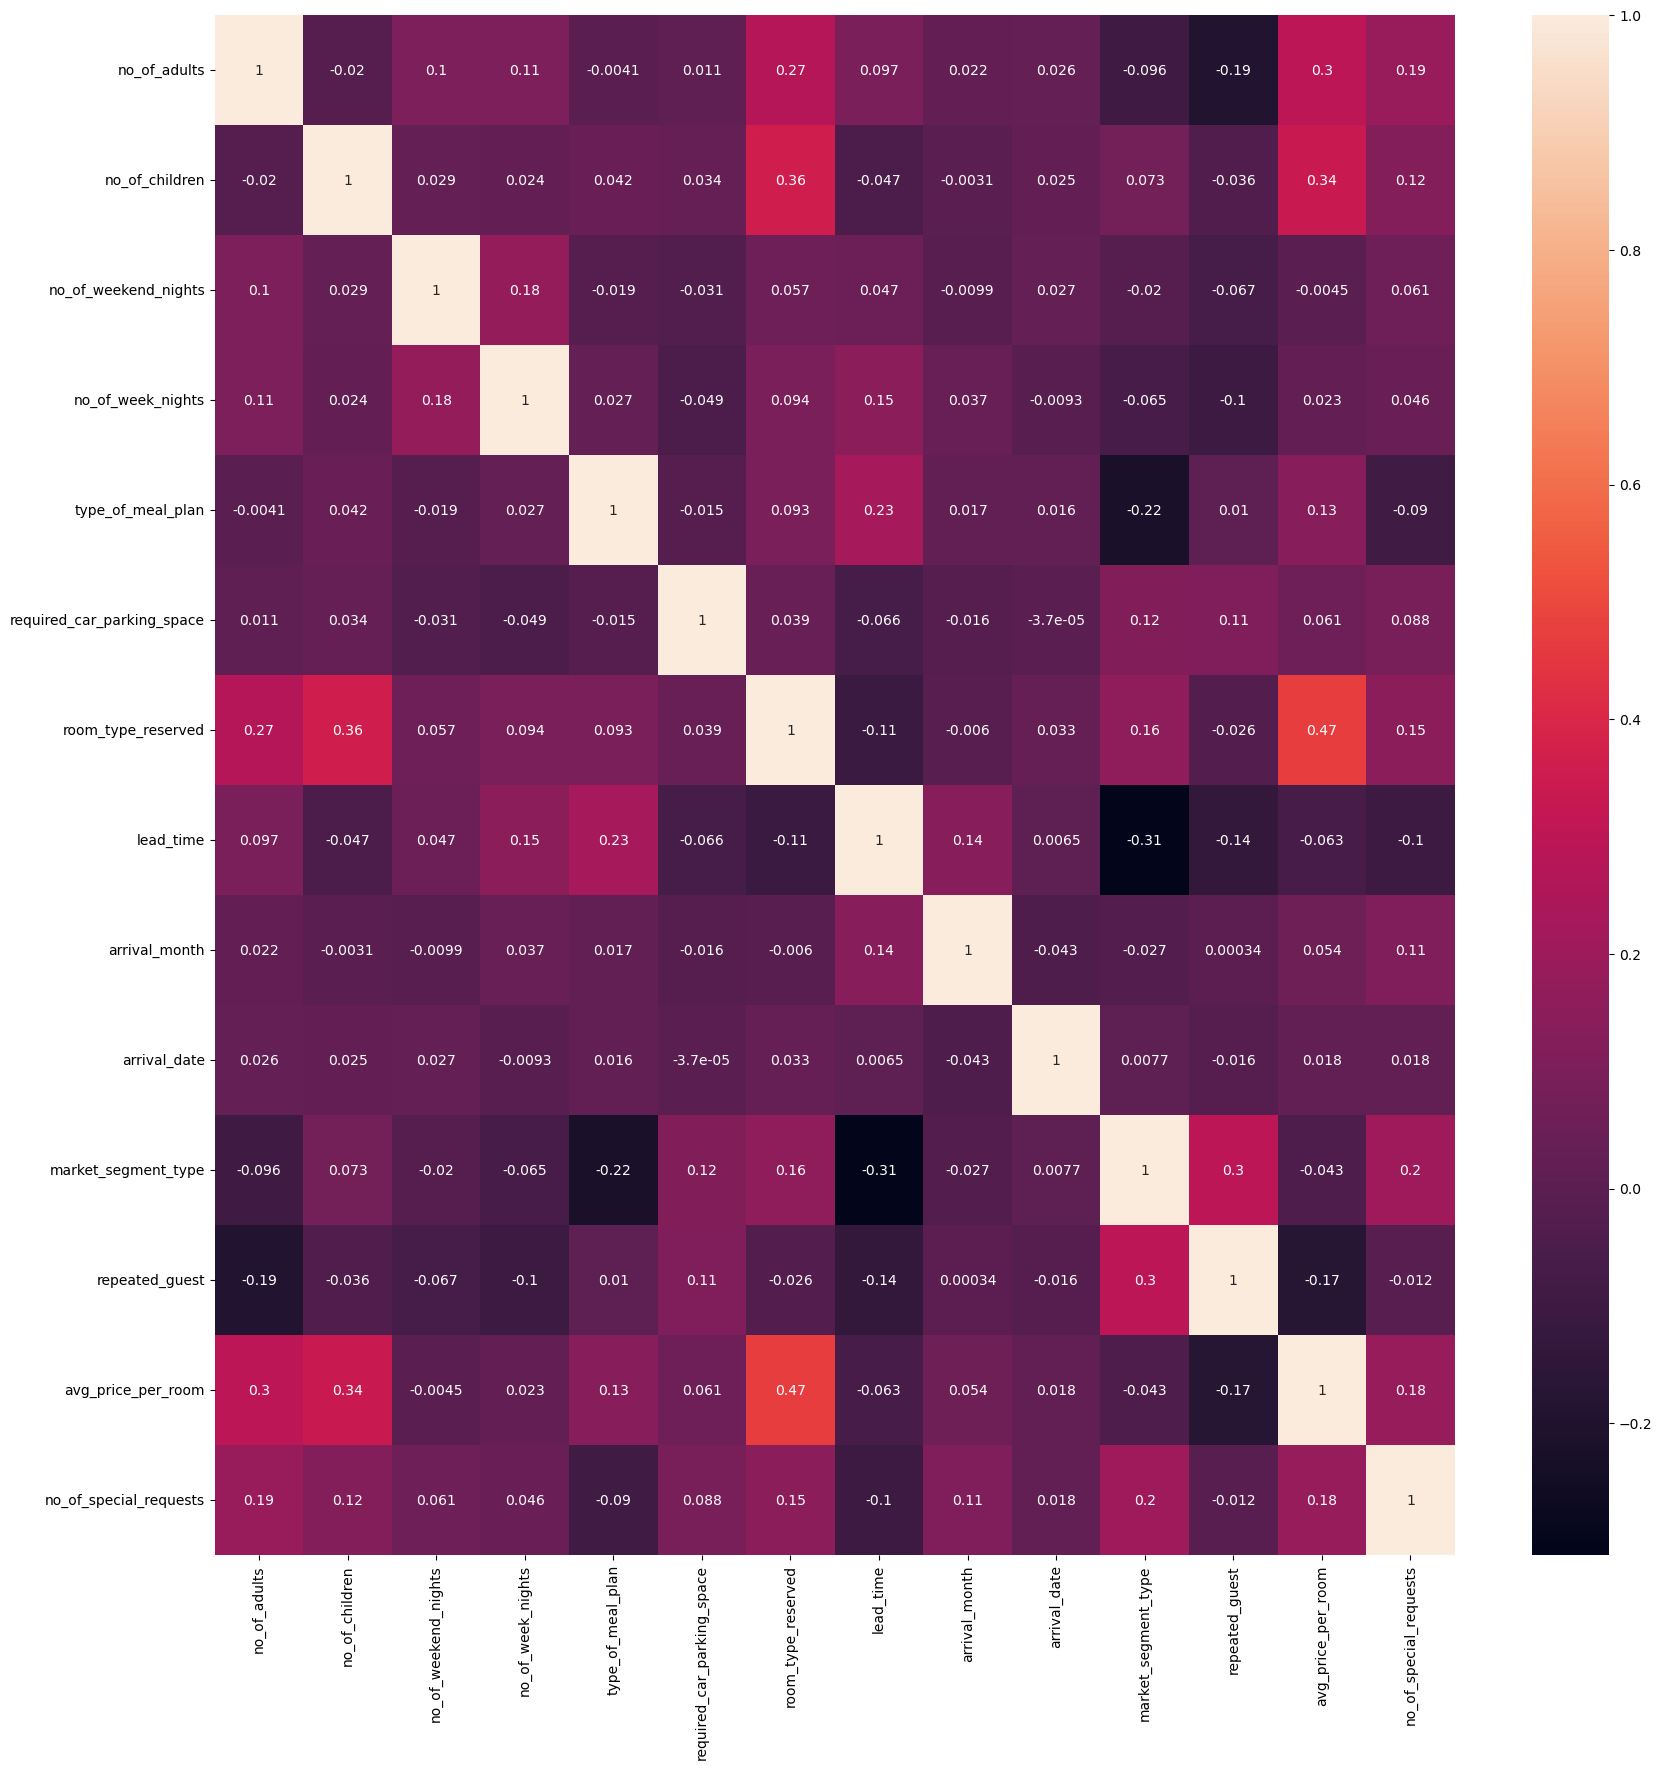

In [240]:
#importing seaborn Library for plotting heat map on correlation
import seaborn as sns
corr=df.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

In [241]:
#Removing the correlated features 

In [242]:
threshold = 0.5

In [243]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [244]:
correlation(df.iloc[:,:-1],threshold)

set()

Information Gain

In [245]:
#this library help us to find out highly correlated features
from sklearn.feature_selection import mutual_info_classif

In [246]:
#Mutual information (MI) [1]_ between two random variables is a non-negative
#value, which measures the dependency between the variables. It is equal
#to zero if and only if two random variables are independent, and higher
#values mean higher dependency.

mutual_info=mutual_info_classif(x,y)

In [247]:
mutual_data=pd.Series(mutual_info,index=x.columns)
mutual_data.sort_values(ascending=False)


lead_time                     0.134175
avg_price_per_room            0.094277
no_of_special_requests        0.037307
arrival_month                 0.023586
market_segment_type           0.015725
repeated_guest                0.009114
no_of_adults                  0.006489
no_of_weekend_nights          0.006332
type_of_meal_plan             0.006205
no_of_week_nights             0.005970
arrival_date                  0.005615
room_type_reserved            0.005590
required_car_parking_space    0.005500
no_of_children                0.000000
dtype: float64